<a href="https://colab.research.google.com/github/javed163/Deep-Learning/blob/main/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

In [6]:
from sklearn.datasets import make_moons

x,y = make_moons(n_samples = 100, noise  =0.3, random_state = 2)

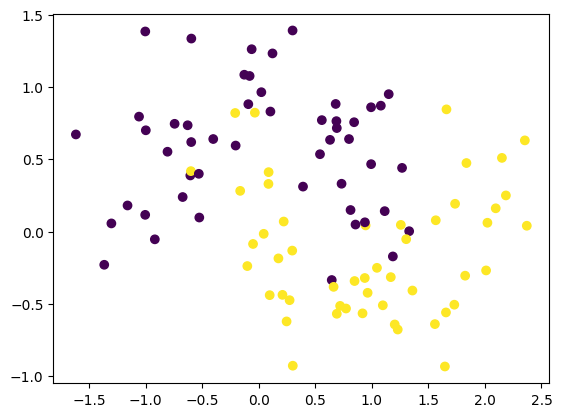

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1], c = y)
plt.show()

In [8]:
model  = Sequential()
model.add(Dense(128, input_dim = 2, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = "sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
adam = Adam(learning_rate=0.01)
model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])


In [11]:
history1 = model.fit(x,y, epochs = 100, validation_split=0.2, verbose = 0)

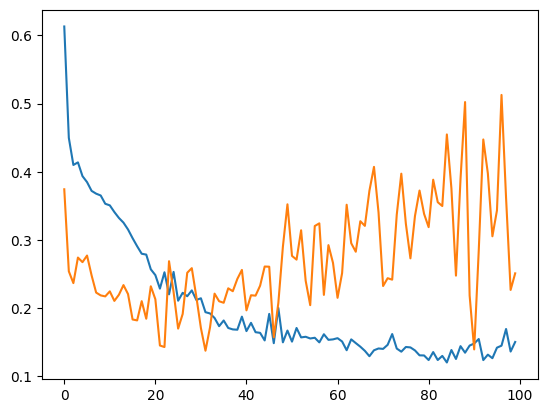

In [12]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step


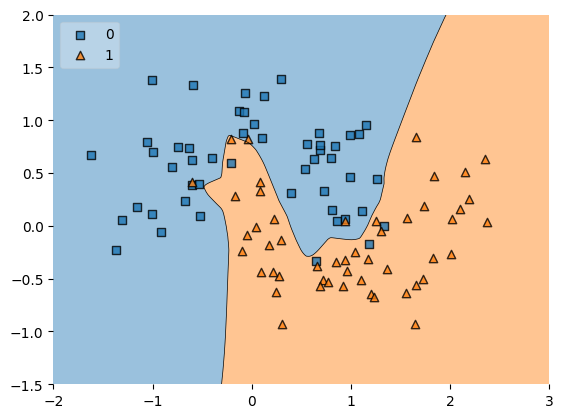

In [15]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x, y.astype('int'), clf = model, legend = 2)
plt.xlim(-2,3)
plt.ylim(-1.5, 2)
plt.show()

In [38]:
model1 = Sequential()
model1.add(Dense(128, input_dim = 2, activation = 'relu', kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model1.add(Dense(128, activation = 'relu', kernel_regularizer = tensorflow.keras.regularizers.l2(0.03)))
model1.add(Dense(1, activation = 'sigmoid'))

# Create a separate optimizer instance
adam_optimizer = Adam(learning_rate = 0.01)

# Compile the model, using the optimizer instance
model1.compile(loss = 'binary_crossentropy', optimizer = adam_optimizer, metrics = ['accuracy'])
history2 = model1.fit(x,y, epochs = 100, validation_split = 0.2, verbose = 0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step


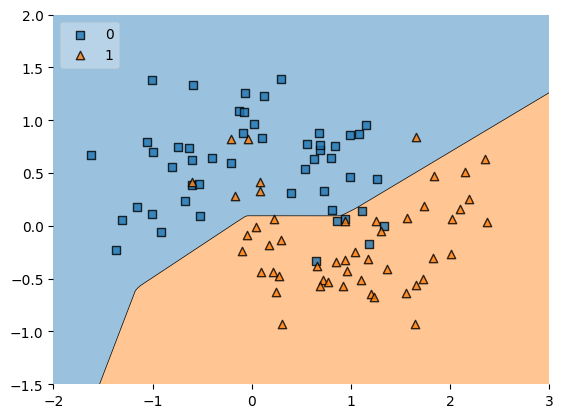

In [41]:
plot_decision_regions(x, y.astype('int'), clf = model1, legend = 2)
plt.xlim(-2,3)
plt.ylim(-1.5, 2)
plt.show()

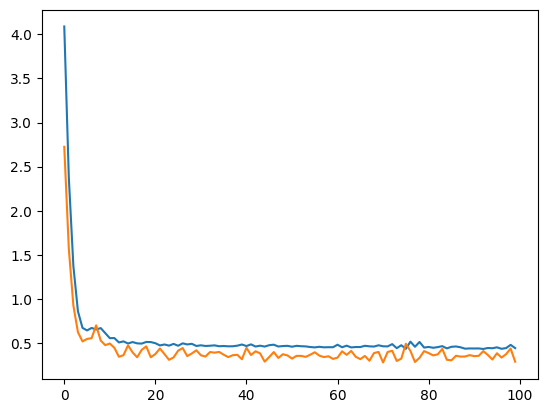

In [43]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.show()

In [44]:
model1_layer1_weight = model.get_weights()[0].reshape(256)
model2_layers_weight = model1.get_weights()[0].reshape(256)

<Axes: >

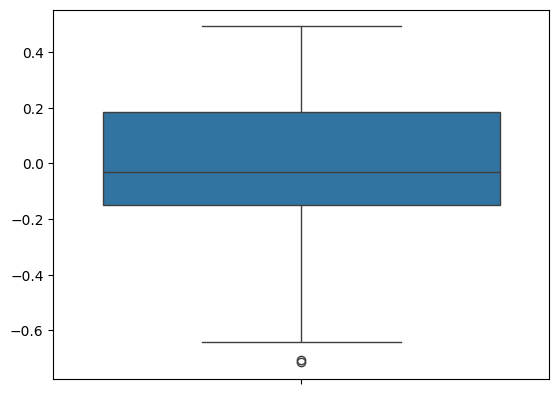

In [45]:
import seaborn as sns
sns.boxplot(model1_layer1_weight)

<Axes: >

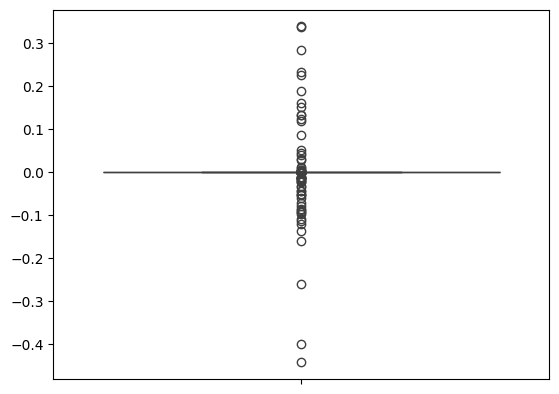

In [46]:
sns.boxplot(model2_layers_weight)

In [47]:
model1_layer1_weight.max()

0.49266383

In [48]:
model2_layers_weight.max()

0.3377757

In [ ]:
sns.distplot(model1_layer1_weight)
sns.displot(model2_layers_weight)